# **PCOS and UTI Diagnosis Expert System**

## **Problem statement**

**The current diagnostic processes for gynaecological disorders like Urinary Tract Infection (UTI) and Polycystic Ovary Syndrome (PCOS) often rely on subjective assessments and conventional methods that can be time-consuming and prone to errors. Existing systems utilize traditional machine learning algorithms such as Decision Tree, Random Forest, and Support Vector Classifier, but these methods may lack the precision needed for accurate diagnosis. The challenge is to enhance diagnostic accuracy and efficiency by implementing advanced algorithms and integrating Natural Language Processing (NLP) to analyze patient data comprehensively, thus addressing the limitations of current diagnostic practices.**

# **IMPORTING LIBRARIES AND LOADING THE DATASET**

In [20]:
# importing necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [21]:
# loading the dataset 
df = pd.read_csv(r'diagnosis_dataset.csv')

In [22]:
# displaying the first five rows of the dataset
df.head()

,Nausea,Lumber Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Itch,Swelling of Urethra Outlet,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin,Irregular Periods,No Periods,Excessive Hair Growth,Buttocks Weight Gain,Belly Fat,Hair Loss,Acne,Disease Name
0,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,PCOS
1,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Healthy
2,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Healthy
3,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,UTI
4,Yes,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,No,Yes,PCOS


In [23]:
# displaying last 5 records of the dataset
df.tail()

,Nausea,Lumber Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Itch,Swelling of Urethra Outlet,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin,Irregular Periods,No Periods,Excessive Hair Growth,Buttocks Weight Gain,Belly Fat,Hair Loss,Acne,Disease Name
1995,No,Yes,No,No,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,No,No,Healthy
1996,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,Healthy
1997,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,PCOS
1998,No,Yes,No,Yes,Yes,No,No,No,No,Yes,No,No,No,Yes,No,No,UTI
1999,Yes,No,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,UTI


# **Exploratory Data Analysis (EDA)**

In [24]:
# displaying dataset columns of the dataset
df.columns

Index(['Nausea', 'Lumber Pain', 'Urine Pushing', 'Micturition Pains',
       'Burning of Urethra', 'Itch', 'Swelling of Urethra Outlet',
       'Inflammation of Urinary Bladder', 'Nephritis of Renal Pelvis Origin',
       'Irregular Periods', 'No Periods', 'Excessive Hair Growth',
       'Buttocks Weight Gain', 'Belly Fat', 'Hair Loss', 'Acne',
       'Disease Name'],
      dtype='object')

<h2>Here are descriptions for each column of the dataset:</h2><h5>

1. **Nausea**: Indicates whether the patient experiences nausea. Values are 'Yes' or 'No'.

2. **Lumber Pain**: Indicates whether the patient experiences pain in the lumbar (lower back) region. Values are 'Yes' or 'No'.

3. **Urine Pushing**: Indicates whether the patient experiences a sensation of pushing or pressure while urinating. Values are 'Yes' or 'No'.

4. **Micturition Pains**: Indicates whether the patient experiences pain during urination. Values are 'Yes' or 'No'.

5. **Burning of Urethra**: Indicates whether the patient feels a burning sensation in the urethra. Values are 'Yes' or 'No'.

6. **Itch**: Indicates whether the patient experiences itching in the genital area. Values are 'Yes' or 'No'.

7. **Swelling of Urethra Outlet**: Indicates whether there is swelling at the outlet of the urethra. Values are 'Yes' or 'No'.

8. **Inflammation of Urinary Bladder**: Indicates whether the patient has inflammation of the urinary bladder (cystitis). Values are 'Yes' or 'No'.

9. **Nephritis of Renal Pelvis Origin**: Indicates whether the patient has nephritis (inflammation) of the renal pelvis. Values are 'Yes' or 'No'.

10. **Irregular Periods**: Indicates whether the patient experiences irregular menstrual periods. Values are 'Yes' or 'No'.

11. **No Periods**: Indicates whether the patient has no menstrual periods (amenorrhea). Values are 'Yes' or 'No'.

12. **Excessive Hair Growth**: Indicates whether the patient has excessive hair growth, typically in areas where men usually grow hair (hirsutism). Values are 'Yes' or 'No'.

13. **Buttocks Weight Gain**: Indicates whether the patient has gained weight specifically in the buttocks area. Values are 'Yes' or 'No'.

14. **Belly Fat**: Indicates whether the patient has increased fat accumulation in the abdominal area. Values are 'Yes' or 'No'.

15. **Hair Loss**: Indicates whether the patient experiences hair loss. Values are 'Yes' or 'No'.

16. **Acne**: Indicates whether the patient has acne. Values are 'Yes' or 'No'.

17. **Disease Name**: The diagnosed disease based on the attributes provided. Possible values are 'UTI' (Urinary Tract Infection), 'PCOS' (Polycystic Ovary Syndrome), 'Healthy', or 'None'.</h5>


**Let's understand more about the data**

In [25]:
# displaying shape of the dataset
df.shape

(2000, 17)

**There are 2000 records and 17 features in our dataset**

In [26]:
# checking of null values 
df.isnull().sum()

Nausea                              0
Lumber Pain                         0
Urine Pushing                       0
Micturition Pains                   0
Burning of Urethra                  0
Itch                                0
Swelling of Urethra Outlet          0
Inflammation of Urinary Bladder     0
Nephritis of Renal Pelvis Origin    0
Irregular Periods                   0
No Periods                          0
Excessive Hair Growth               0
Buttocks Weight Gain                0
Belly Fat                           0
Hair Loss                           0
Acne                                0
Disease Name                        0
dtype: int64

**As we can see from the above image there are no null values in the dataset**

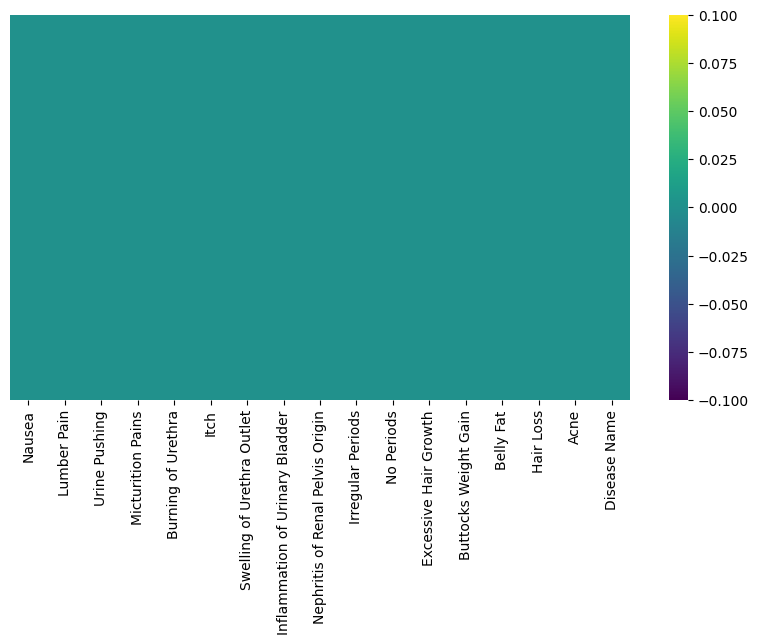

In [27]:
# plot the line plot to show the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')
plt.show()

In [28]:
# checking the datatypes of the columns
df.dtypes

Nausea                              object
Lumber Pain                         object
Urine Pushing                       object
Micturition Pains                   object
Burning of Urethra                  object
Itch                                object
Swelling of Urethra Outlet          object
Inflammation of Urinary Bladder     object
Nephritis of Renal Pelvis Origin    object
Irregular Periods                   object
No Periods                          object
Excessive Hair Growth               object
Buttocks Weight Gain                object
Belly Fat                           object
Hair Loss                           object
Acne                                object
Disease Name                        object
dtype: object

In [29]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Nausea                            2000 non-null   object
 1   Lumber Pain                       2000 non-null   object
 2   Urine Pushing                     2000 non-null   object
 3   Micturition Pains                 2000 non-null   object
 4   Burning of Urethra                2000 non-null   object
 5   Itch                              2000 non-null   object
 6   Swelling of Urethra Outlet        2000 non-null   object
 7   Inflammation of Urinary Bladder   2000 non-null   object
 8   Nephritis of Renal Pelvis Origin  2000 non-null   object
 9   Irregular Periods                 2000 non-null   object
 10  No Periods                        2000 non-null   object
 11  Excessive Hair Growth             2000 non-null   object
 12  Buttocks Weight Gain

### The insights from the dataset are as follows::

1. **No Null Values**:
   - There are no null values in the dataset, ensuring that machine learning models or data analysis will not encounter issues due to missing data.

2. **Data Distribution**:
   - Since every entry in Disease Name is either 'UTI', 'PCOS', or 'Healthy', and no entries are 'None', you have a balanced dataset in terms of the target variable.

3. **Data Type Efficiency**:
   - Since all columns are of type object, converting columns that are categorical to a more efficient data type like category can reduce memory usage and improve processing speed.

4. **Performance of the Data**:
   - The absence of null values and consistent data types suggest that the dataset is well-prepared for analysis. However, the performance and effectiveness of the dataset in machine learning tasks depend on:

     - **Class Distribution**: Ensure that the target variable (Disease Name) is balanced across classes to avoid biased models.
     - **Feature Relevance**: Check if all features (symptoms) are relevant for predicting the target variable. Feature selection might be needed based on the domain knowledge or data analysis.
     
     - **Data Preprocessing**: Ensure proper encoding for categorical variables if used in machine learning models.

**These insights provide an initial understanding of the dataset's characteristics, missing data, and potential areas for further analysis and model development.**


In [30]:
import plotly.express as px
px.histogram(df,'Disease Name',facet_col='Acne', color='Disease Name', marginal='rug')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Disease Name=%{x}<br>Acne=Yes<br>count=%{y}<extra></extra>',
              'legendgroup': 'PCOS',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'PCOS',
              'offsetgroup': 'PCOS',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['PCOS', 'PCOS', 'PCOS', ..., 'PCOS', 'PCOS', 'PCOS'], dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'boxpoints': 'all',
              'fillcolor': 'rgba(255,255,255,0)',
              'hoveron': 'points',
              'hovertemplate': 'Disease Name=%{x}<br>Acne=Yes<extra></extra>',
              'jitter': 0,
              'legendgroup': 'PCOS',
              'line': {'color': 'rgba(255,255,255,0)'},
              'marker': {'color': '#636efa', 'symbol': 'line-ns-open'},
              'name': 'PCOS',
              'offsetgroup': 'PCOS',
              'showlegend': False,
              'type': 'box',
              'x': array(['PCOS', 'PCOS', 'PCOS', ..., 'PCOS', 'PCOS', 'PCOS'], dtype=object),
              'xaxis': 'x3',
              'yaxis': 'y3'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Disease Name=%{x}<br>Acne=No<br>count=%{y}<extra></extra>',
              'legendgroup': 'PCOS',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'PCOS',
              'offsetgroup': 'PCOS',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['PCOS', 'PCOS', 'PCOS', ..., 'PCOS', 'PCOS', 'PCOS'], dtype=object),
              'xaxis': 'x2',
              'yaxis': 'y2'},
             {'alignmentgroup': 'True',
              'boxpoints': 'all',
              'fillcolor': 'rgba(255,255,255,0)',
              'hoveron': 'points',
              'hovertemplate': 'Disease Name=%{x}<br>Acne=No<extra></extra>',
              'jitter': 0,
              'legendgroup': 'PCOS',
              'line': {'color': 'rgba(255,255,255,0)'},
              'marker': {'color': '#636efa', 'symbol': 'line-ns-open'},
              'name': 'PCOS',
              'offsetgroup': 'PCOS',
              'showlegend': False,
              'type': 'box',
              'x': array(['PCOS', 'PCOS', 'PCOS', ..., 'PCOS', 'PCOS', 'PCOS'], dtype=object),
              'xaxis': 'x4',
              'yaxis': 'y4'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Disease Name=%{x}<br>Acne=Yes<br>count=%{y}<extra></extra>',
              'legendgroup': 'Healthy',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Healthy',
              'offsetgroup': 'Healthy',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['Healthy', 'Healthy', 'Healthy', ..., 'Healthy', 'Healthy', 'Healthy'],
                         dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'boxpoints': 'all',
              'fillcolor': 'rgba(255,255,255,0)',
              'hoveron': 'points',
              'hovertemplate': 'Disease Name=%{x}<br>Acne=Yes<extra></extra>',
              'jitter': 0,
              'legendgroup': 'Healthy',
              'line': {'color': 'rgba(255,255,255,0)'},
              'marker': {'color': '#EF553B', 'symbol': 'line-ns-open'},
              'name': 'Healthy',
              'offsetgroup': 'Healthy',
              'showlegend': False,
              'type': 'box',
              'x': array(['Healthy', 'Healthy', 'Healthy', ..., 'Healthy', 'Healthy', 'Healthy'],
                         dtype=object),
              '

In [31]:
# printing the high percentage of promotion in each column
for col in df.columns:
    if col != 'Disease Name':
        print(df.groupby(df[col])['Disease Name'].value_counts(normalize=True)*100,end=" ")

Nausea  Disease Name
No      PCOS            41.658031
        Healthy         30.362694
        UTI             27.979275
Yes     UTI             43.091787
        Healthy         29.758454
        PCOS            27.149758
Name: proportion, dtype: float64 Lumber Pain  Disease Name
No           UTI             36.391437
             PCOS            33.639144
             Healthy         29.969419
Yes          UTI             35.230618
             PCOS            34.641806
             Healthy         30.127576
Name: proportion, dtype: float64 Urine Pushing  Disease Name
No             PCOS            40.061475
               Healthy         31.557377
               UTI             28.381148
Yes            UTI             42.871094
               Healthy         28.613281
               PCOS            28.515625
Name: proportion, dtype: float64 Micturition Pains  Disease Name
No                 UTI             35.347432
                   PCOS            34.441088
                   H

In [32]:
# statistical summary of the dataset
df.describe().T

,count,unique,top,freq
Nausea,2000,2,Yes,1035
Lumber Pain,2000,2,Yes,1019
Urine Pushing,2000,2,Yes,1024
Micturition Pains,2000,2,Yes,1007
Burning of Urethra,2000,2,No,1042
Itch,2000,2,No,1031
Swelling of Urethra Outlet,2000,2,Yes,1011
Inflammation of Urinary Bladder,2000,2,No,1013
Nephritis of Renal Pelvis Origin,2000,2,No,1023
Irregular Periods,2000,2,No,1023


Here’s a brief statistical summary for each column based on the provided information:

1. **Nausea**:Average: 51.75% Yes, 48.25% No is Most Frequent Values -- Yes (1035 occurrences)

2. **Lumber Pain**:- verage 50.95% Yes, 49.05% No- ost Frequent Value Yes (1019 occurrences) Yes (1024 occurrences)

4. **Micturition Pains**:- verage 50.35% Yes, 49.65% No- ost Frequent Value Yes (1007 occurrences5). 

6. **Itch**:- Average: 48.45% Yes, 51.55% No-*Most Frequent Value: No (1031 occurrences)

7. **Swelling of Urethra Outlet**:- Average: 50.55% Yes, 49.45% No- Most Frequent Value: Yes (1011 occurrences)

8. **Inflammation of Urinary Bladder** Average: 50.65% Yes, 49.35% NMost Frequent Value: No (1013 occurrences)

9. **Nephritis of Renal Pelvis Origin** Average: 48.85% Yes, 51.15% NMost Frequent Value: No (1023 occurrences)

10. **Irregular Periods**:**Average**: 48.85% Yes, 51.15%, No is Most Frequent Value**: No (1023 occurrences)

11. **No Periods**:**Average**: 48.65% Yes, 51.35% ,No Most Frequent Values No (1037 occurrences)

12. **Excessive Hair Growth**:**Average**: 48.1% Yes, 51.9%, No is Most Frequent Values No (1038 occurrences)

13. **Buttocks Weight Gain**:**Average**: 50.4% Yes, 49.6%, No Most Frequent Valu Yes (1008 occurrences)

14. **Belly Fat**:**Average**: 51.1% Yes, 48.9% NoMost Frequent Values, Yes (1022 occurrences)

15. **Hair Loss**:**Average**: 49.1% Yes, 50.9% No is Most Frequent Value: No (1018 occurrences)

16. **Acne**:**Average**: 50.3% Yes, 49.7% N Most Frequent Value Yes (1006 occurrences)

17. **Disease Name**:**Average**: 35.8% UTI, 28.4% PCOS, 35.8% Healthy,Most Frequent Value UTI (716 occurrences)

In [33]:
# checking the unique values of the dataset
df.nunique()

Nausea                              2
Lumber Pain                         2
Urine Pushing                       2
Micturition Pains                   2
Burning of Urethra                  2
Itch                                2
Swelling of Urethra Outlet          2
Inflammation of Urinary Bladder     2
Nephritis of Renal Pelvis Origin    2
Irregular Periods                   2
No Periods                          2
Excessive Hair Growth               2
Buttocks Weight Gain                2
Belly Fat                           2
Hair Loss                           2
Acne                                2
Disease Name                        3
dtype: int64

In [34]:
for col in df.columns:
    if col != 'Disease Name':  # Skip the target column for feature histograms
        # Plot using Plotly
        fig = px.histogram(df, x=col, color='Disease Name', title=f'Distribution of {col} by Disease Name')
        fig.update_layout(
            autosize=False,
            width=500,  # Approximate width in pixels (5 inches * 100 pixels per inch)
            height=500  # Approximate height in pixels (5 inches * 100 pixels per inch)
        )
        fig.show()
        
        # For Matplotlib plots (if needed)
        plt.figure(figsize=(5, 5))
        df[col].value_counts().plot(kind='bar', title=f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

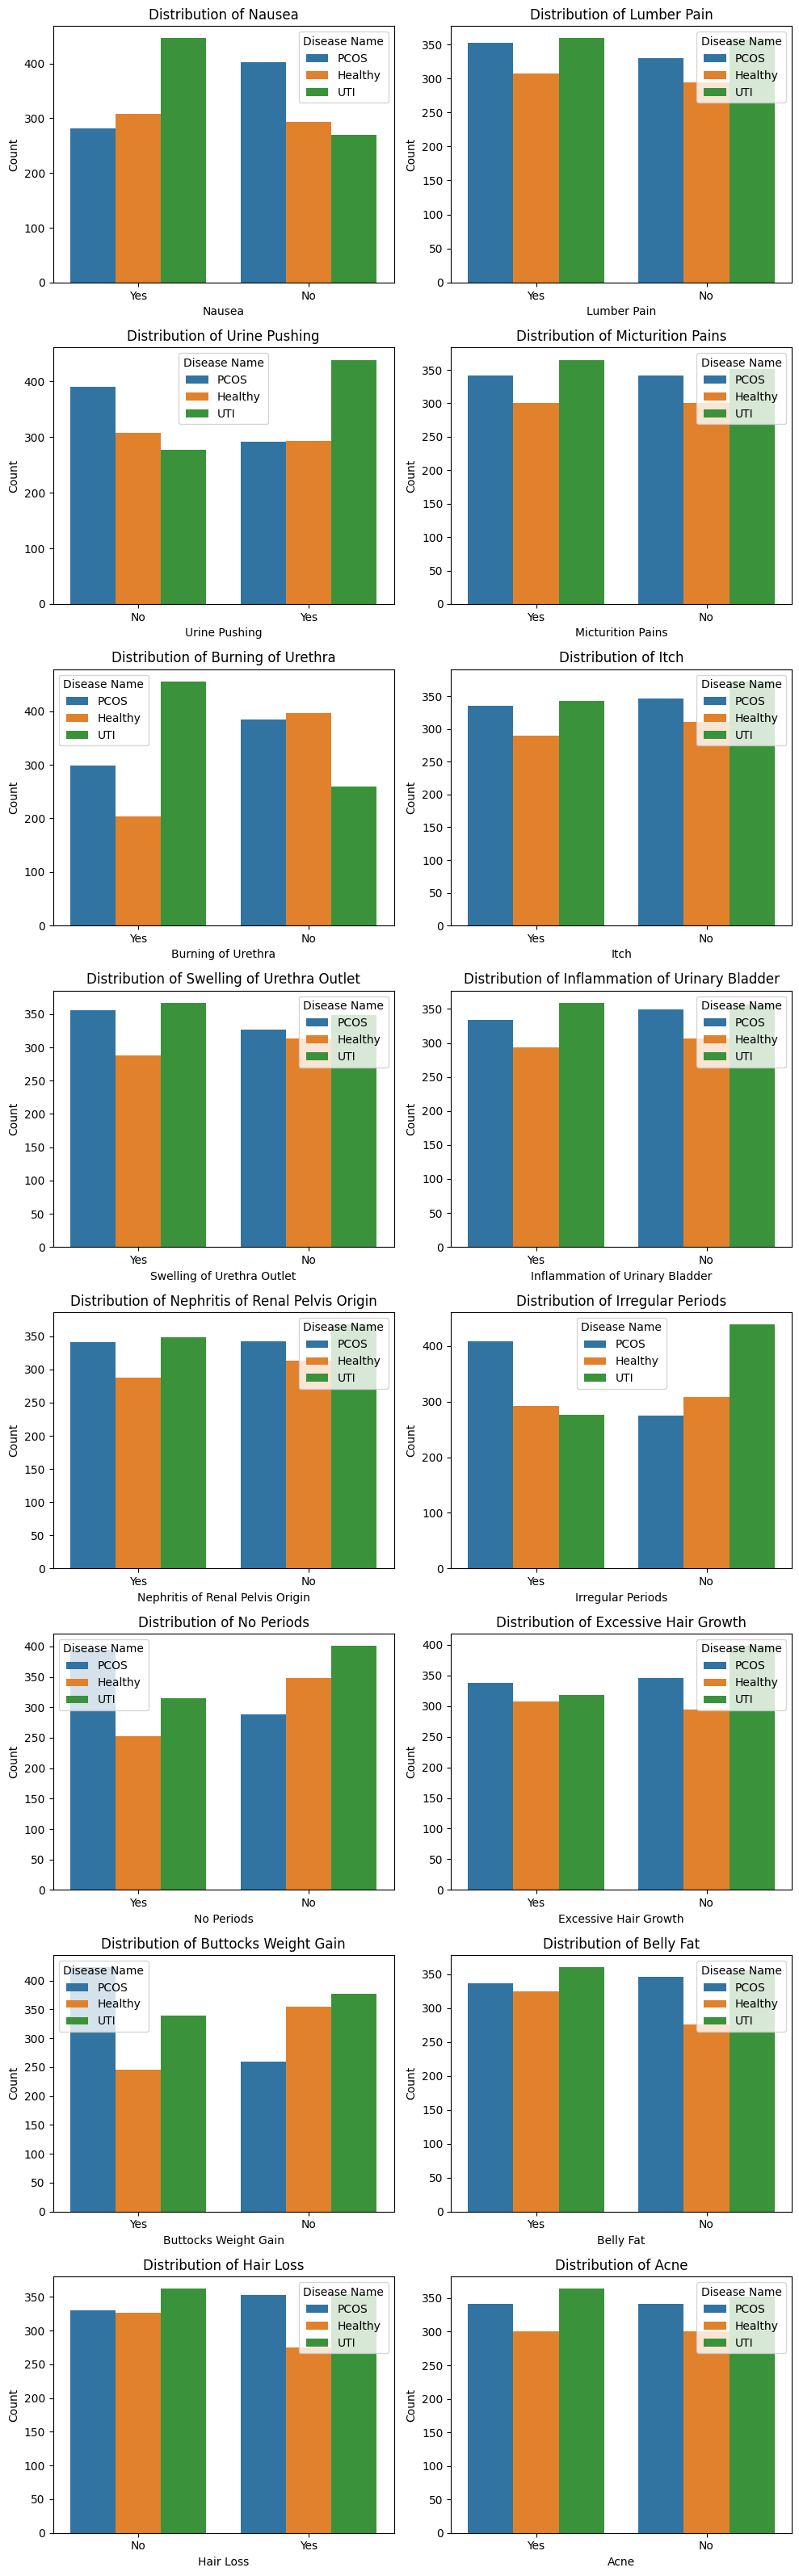

In [282]:
#plots for Distribution of each column
num_cols = len(df.columns) - 1
# Set up the figure and subplots
num_rows = (num_cols + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 4 * num_rows))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot each column in a subplot
for i, col in enumerate(df.columns):
    if col != 'Disease Name':  # Skip the target column for feature histograms
        sns.countplot(x=df[col], hue='Disease Name', data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
# Hide any remaining unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


<h4>The graph shows the distribution of different symptoms across three disease categories: PCOS, Healthy, and UTI. Each bar represents the proportion of individuals with or without the symptom within each disease group. The graph is helpful to understand how different symptoms are associated with each disease and could be used to help identify individuals with specific conditions.</h4>

In [283]:
# write a for loop to print the density plot for each numerical column
for i in df.select_dtypes(include=np.number).columns:
    sns.distplot(df[i])
    plt.show()


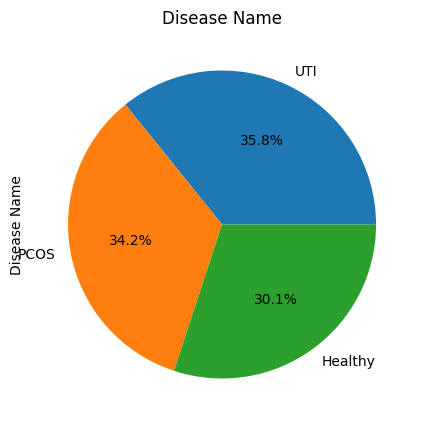

In [284]:
# plotign the donut plot for the Disease Name
plt.figure(figsize=(10,5))
df['Disease Name'].value_counts().plot.pie(autopct='%1.1f%%',title = 'Disease Name')
plt.show()

<h4>This pie chart shows the distribution of different diseases in a dataset.

UTI makes up 35.8% of the data.<br>
PCOS makes up 34.2% of the data.<br>
Healthy makes up 30.1% of the data</h4>

<Axes: title={'center': 'hair loss'}, ylabel='Hair Loss'>

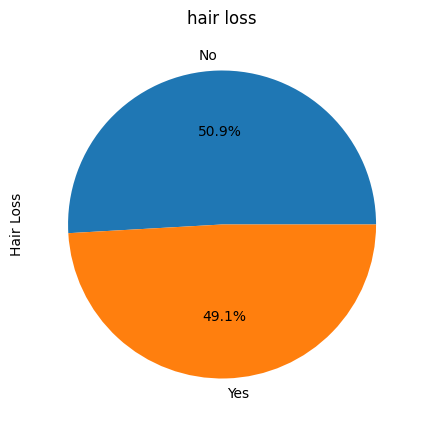

In [285]:
# plot the pie plot for the previous_year_rating column
plt.figure(figsize=(10,5))
df['Hair Loss'].value_counts().plot.pie(autopct='%1.1f%%',title = 'hair loss')

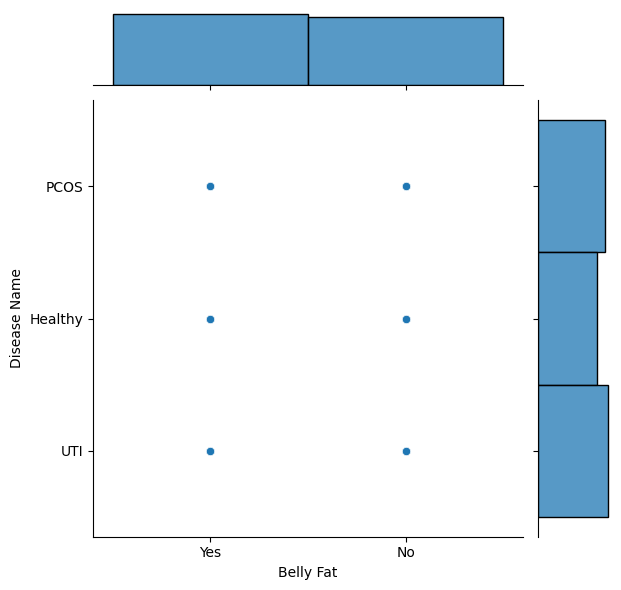

In [286]:
# joint plot for the age and avg_training_score
sns.jointplot(x='Belly Fat',y='Disease Name',data=df)

<Axes: xlabel='Disease Name'>

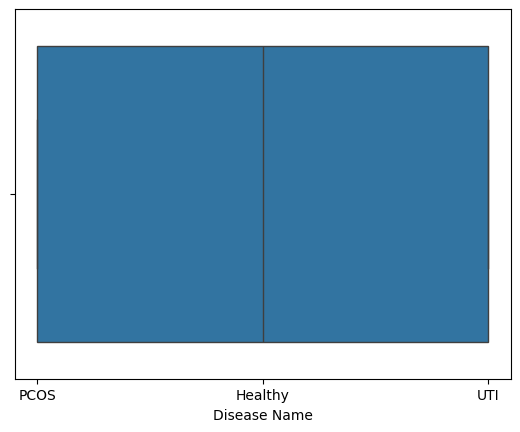

In [287]:
#plot Disease name boxplot
sns.boxplot(x=df['Disease Name'])

<Axes: xlabel='Urine Pushing', ylabel='count'>

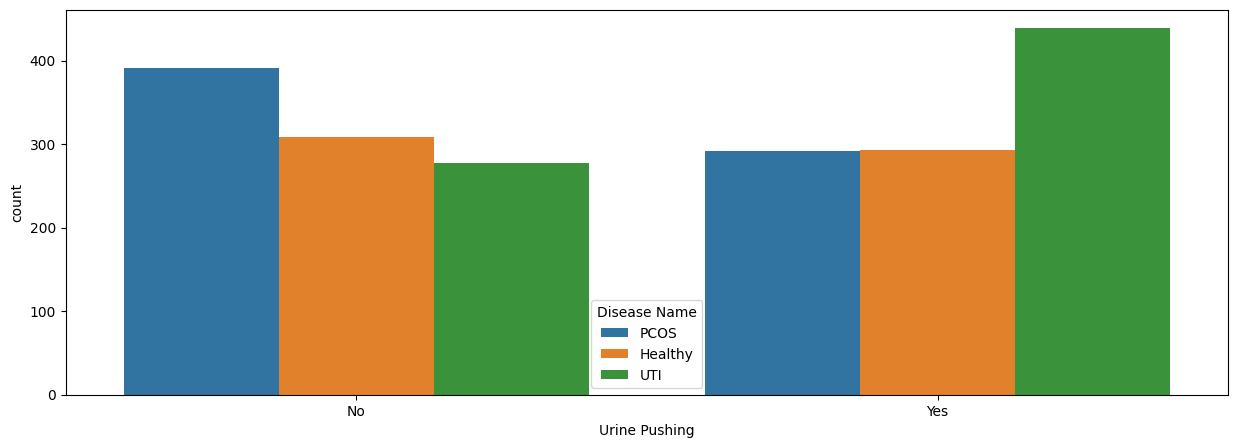

In [288]:
# plot the comparison plot for Urine Pushing the column and age 
plt.figure(figsize=(15,5))
sns.countplot(x='Urine Pushing',hue='Disease Name',data=df)

**This graph shows the number of people with different diseases based on their response to the question, "Do you have any problems with urine pushing?" The graph shows that more people who answered "no" to this question have disease 0, and more people who answered "yes" have disease 2. A smaller number of people have disease 1, with the number fairly evenly split between those who answered "yes" and "no".**


# **Data preprocessing**

In [289]:
# printing the first 5 rows of the dataset
df.head()

,Nausea,Lumber Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Itch,Swelling of Urethra Outlet,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin,Irregular Periods,No Periods,Excessive Hair Growth,Buttocks Weight Gain,Belly Fat,Hair Loss,Acne,Disease Name
0,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,PCOS
1,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Healthy
2,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Healthy
3,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,UTI
4,Yes,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,No,Yes,PCOS


**Converting the object data type to numerical data type**

In [290]:
# converting the object data type to numerical data type by using the LabelEncoder 
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [291]:

#label encoding the data.
# Store original column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")



Mapping for column 'Nausea':
Label 0: No
Label 1: Yes
Mapping for column 'Lumber Pain':
Label 0: No
Label 1: Yes
Mapping for column 'Urine Pushing':
Label 0: No
Label 1: Yes
Mapping for column 'Micturition Pains':
Label 0: No
Label 1: Yes
Mapping for column 'Burning of Urethra':
Label 0: No
Label 1: Yes
Mapping for column 'Itch':
Label 0: No
Label 1: Yes
Mapping for column 'Swelling of Urethra Outlet':
Label 0: No
Label 1: Yes
Mapping for column 'Inflammation of Urinary Bladder':
Label 0: No
Label 1: Yes
Mapping for column 'Nephritis of Renal Pelvis Origin':
Label 0: No
Label 1: Yes
Mapping for column 'Irregular Periods':
Label 0: No
Label 1: Yes
Mapping for column 'No Periods':
Label 0: No
Label 1: Yes
Mapping for column 'Excessive Hair Growth':
Label 0: No
Label 1: Yes
Mapping for column 'Buttocks Weight Gain':
Label 0: No
Label 1: Yes
Mapping for column 'Belly Fat':
Label 0: No
Label 1: Yes
Mapping for column 'Hair Loss':
Label 0: No
Label 1: Yes
Mapping for column 'Acne':
Label 0: 

In [292]:
df.head()

,Nausea,Lumber Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Itch,Swelling of Urethra Outlet,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin,Irregular Periods,No Periods,Excessive Hair Growth,Buttocks Weight Gain,Belly Fat,Hair Loss,Acne,Disease Name
0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0
3,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,2
4,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1


In [293]:
df.head()

,Nausea,Lumber Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Itch,Swelling of Urethra Outlet,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin,Irregular Periods,No Periods,Excessive Hair Growth,Buttocks Weight Gain,Belly Fat,Hair Loss,Acne,Disease Name
0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0
3,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,2
4,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1


In [294]:
#ofter convering the data type 
df.head()

,Nausea,Lumber Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Itch,Swelling of Urethra Outlet,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin,Irregular Periods,No Periods,Excessive Hair Growth,Buttocks Weight Gain,Belly Fat,Hair Loss,Acne,Disease Name
0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0
3,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,2
4,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1


**As we can see that there is no more object data type and missing values in our data set , now our data set is ready to proceed for smote technique**

In [295]:
# printing the correlation matrix of the dataset 
df.corr()

,Nausea,Lumber Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Itch,Swelling of Urethra Outlet,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin,Irregular Periods,No Periods,Excessive Hair Growth,Buttocks Weight Gain,Belly Fat,Hair Loss,Acne,Disease Name
Nausea,1.000000,-0.026686,0.026184,0.007760,0.010486,-0.046966,-0.022400,-0.013554,-0.003198,0.026829,-0.012721,0.014349,-0.009286,0.022249,0.017644,0.020803,0.097025
Lumber Pain,-0.026686,1.000000,0.020554,-0.034140,0.003802,-0.003413,0.009793,0.008249,0.008441,0.022447,-0.005302,0.005727,0.018852,0.004584,-0.028668,0.030892,-0.008146
Urine Pushing,0.026184,0.020554,1.000000,-0.013172,-0.002996,0.025764,0.004738,0.009315,0.007556,-0.016457,0.015903,0.014927,0.001809,-0.028543,-0.041587,-0.020150,0.107661
Micturition Pains,0.007760,-0.034140,-0.013172,1.000000,0.005299,0.020227,-0.022079,-0.003909,-0.013843,-0.019845,-0.025759,-0.010742,-0.027058,-0.043166,0.009128,-0.053044,0.007533
Burning of Urethra,0.010486,0.003802,-0.002996,0.005299,1.000000,-0.016324,-0.012550,-0.007553,-0.013982,0.002036,-0.028599,-0.015621,-0.043704,0.012939,0.019264,-0.021768,0.243488
Itch,-0.046966,-0.003413,0.025764,0.020227,-0.016324,1.000000,-0.025673,-0.022416,-0.010721,-0.002715,0.026884,0.011836,-0.018762,-0.002320,-0.003560,-0.026827,-0.003359
Swelling of Urethra Outlet,-0.022400,0.009793,0.004738,-0.022079,-0.012550,-0.025673,1.000000,-0.017860,-0.005749,0.020260,0.016419,0.003421,0.022914,0.008761,0.013201,0.018935,0.025782
Inflammation of Urinary Bladder,-0.013554,0.008249,0.009315,-0.003909,-0.007553,-0.022416,-0.017860,1.000000,-0.036312,-0.064321,-0.036509,0.058553,0.021106,-0.016719,0.022772,0.005079,0.010190
Nephritis of Renal Pelvis Origin,-0.003198,0.008441,0.007556,-0.013843,-0.013982,-0.010721,-0.005749,-0.036312,1.000000,0.005474,0.049196,0.002128,0.037195,0.003508,0.032600,0.003139,0.004724
Irregular Periods,0.026829,0.022447,-0.016457,-0.019845,0.002036,-0.002715,0.020260,-0.064321,0.005474,1.000000,0.005154,-0.019894,-0.022823,0.019516,0.014592,-0.002863,-0.087957


**Key Insights from the Correlation Matrix**

- **Positive Correlations**:
  - Attributes such as **Nausea** and **Acne** have a moderate positive correlation (0.097025). This suggests that if a patient experiences nausea, they are slightly more likely to report acne.
  - **Urine Pushing** and **Disease Name** show a higher positive correlation (0.107661), indicating that the presence of urine pushing symptoms is more likely to be associated with certain diseases.

- **Negative Correlations**:
  - **Lumber Pain** and **Acne** have a slight negative correlation (-0.028668). This suggests a very weak inverse relationship between these two attributes.
  - **Micturition Pains** and other attributes have relatively low or mixed correlation values, indicating varying degrees of relationship with the disease name.


In [296]:
#find the corrlation with Disease Name
df.corr()['Disease Name']

Nausea                              0.097025
Lumber Pain                        -0.008146
Urine Pushing                       0.107661
Micturition Pains                   0.007533
Burning of Urethra                  0.243488
Itch                               -0.003359
Swelling of Urethra Outlet          0.025782
Inflammation of Urinary Bladder     0.010190
Nephritis of Renal Pelvis Origin    0.004724
Irregular Periods                  -0.087957
No Periods                          0.008193
Excessive Hair Growth              -0.054787
Buttocks Weight Gain                0.043291
Belly Fat                          -0.029367
Hair Loss                           0.027845
Acne                                0.007604
Disease Name                        1.000000
Name: Disease Name, dtype: float64

<Axes: >

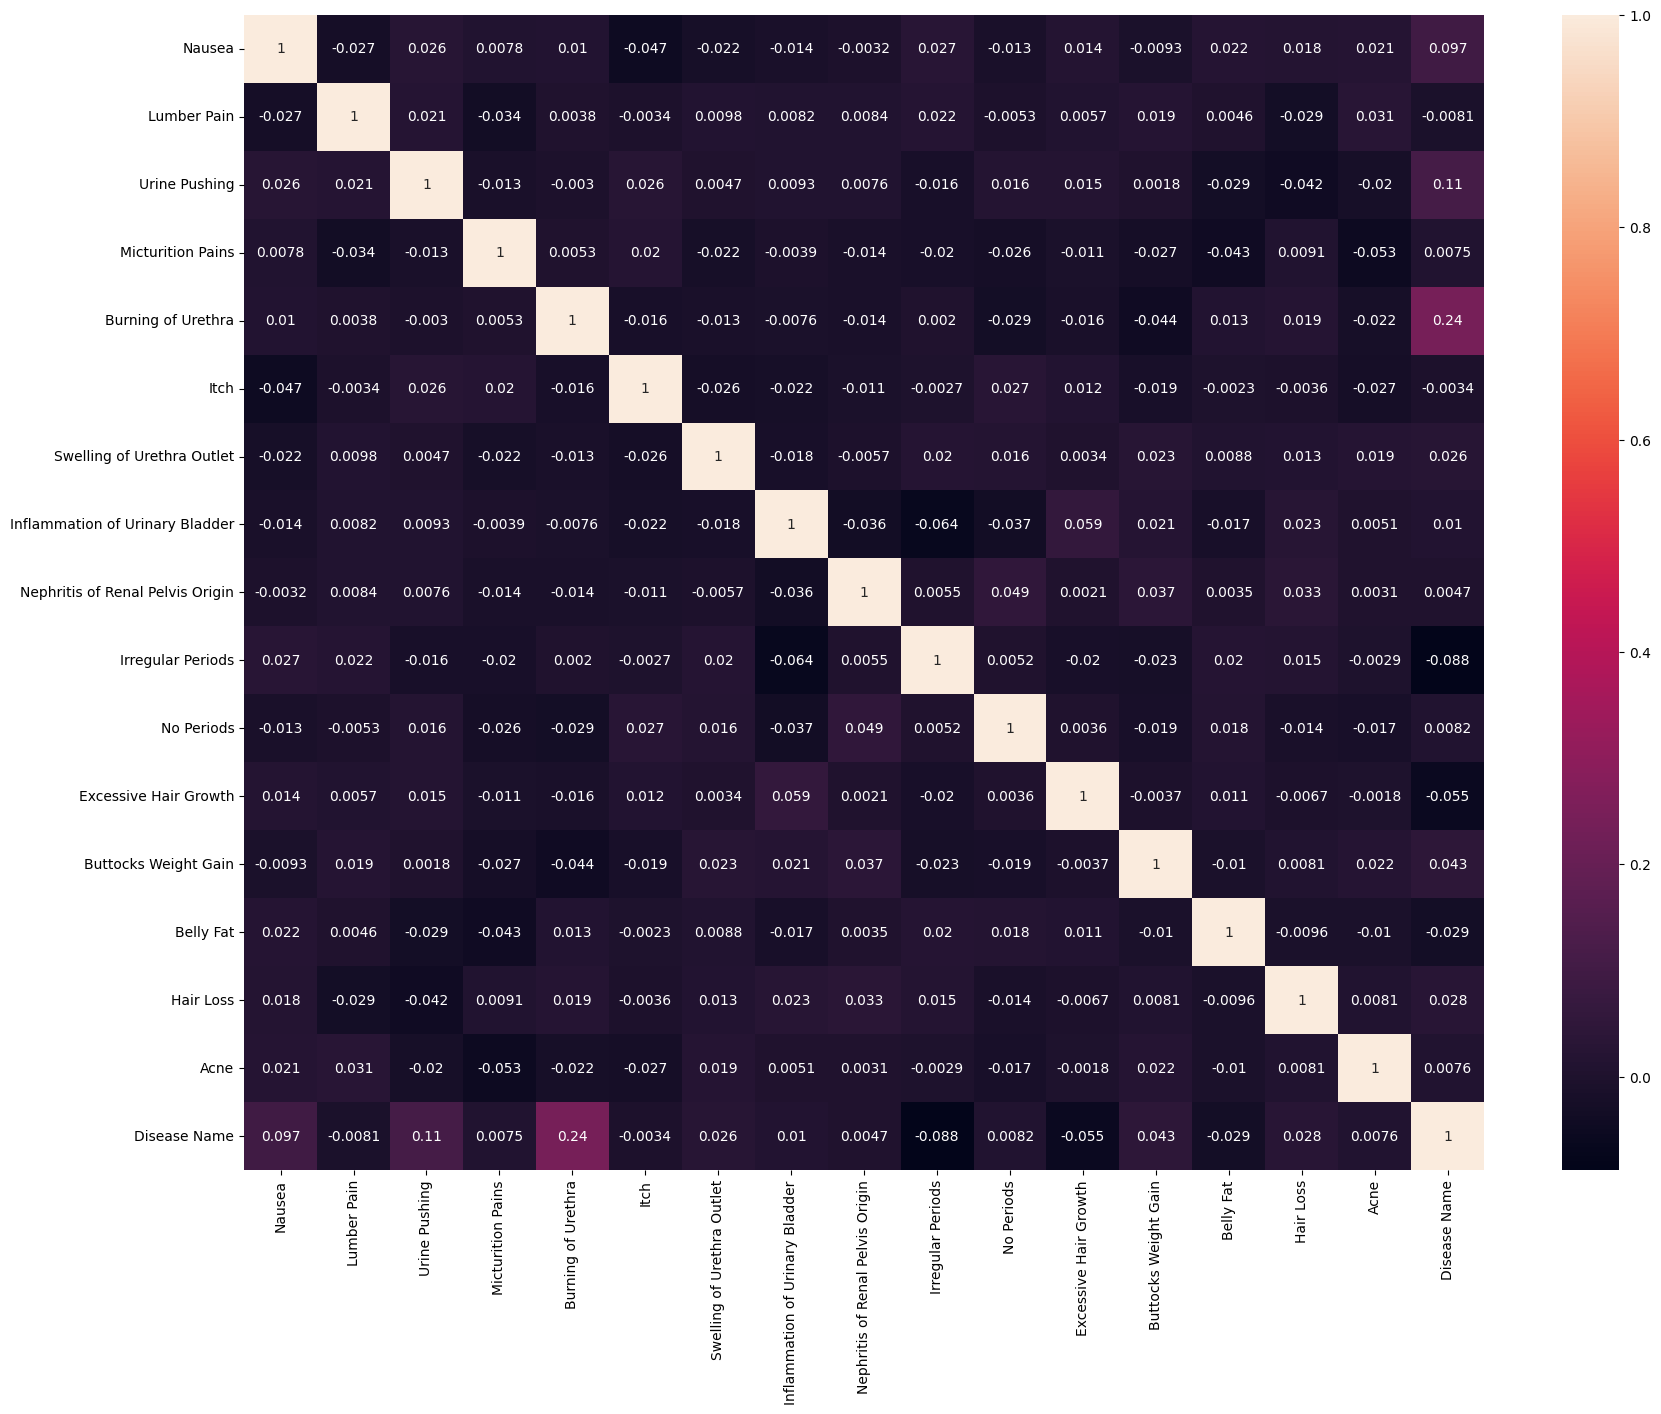

In [297]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='blue')

In [298]:
#plot for Nausea,Lumber Pain compare with Disease Name
plt.figure(figsize=(5,5))
fig = px.sunburst(df,path=[ 'Nausea','Lumber Pain'], values='Disease Name')
fig.update_layout(
            autosize=False,
            width=500,  # Approximate width in pixels (5 inches * 100 pixels per inch)
            height=500  # Approximate height in pixels (5 inches * 100 pixels per inch)
        )
fig.show()

<Figure size 500x500 with 0 Axes>

**Checking the dataset balance or not**

In [299]:
df['Disease Name'].value_counts().to_dict()

{2: 716, 1: 683, 0: 601}

<Axes: >

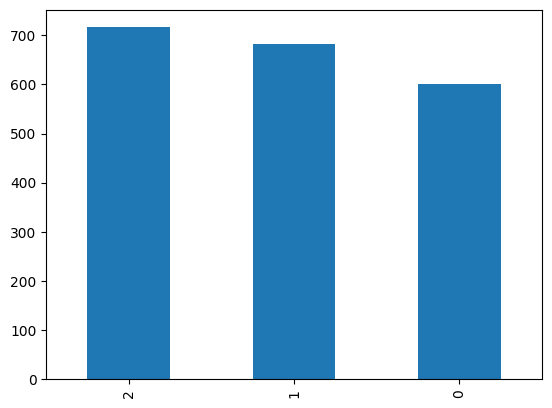

In [300]:
df['Disease Name'].value_counts().plot(kind='bar')

In [301]:
df.columns

Index(['Nausea', 'Lumber Pain', 'Urine Pushing', 'Micturition Pains',
       'Burning of Urethra', 'Itch', 'Swelling of Urethra Outlet',
       'Inflammation of Urinary Bladder', 'Nephritis of Renal Pelvis Origin',
       'Irregular Periods', 'No Periods', 'Excessive Hair Growth',
       'Buttocks Weight Gain', 'Belly Fat', 'Hair Loss', 'Acne',
       'Disease Name'],
      dtype='object')

**Create the Independent and Dependent Featuer**

In [302]:
columns = ['Nausea', 'Lumber Pain', 'Urine Pushing', 'Micturition Pains',
       'Burning of Urethra', 'Itch', 'Swelling of Urethra Outlet',
       'Inflammation of Urinary Bladder', 'Nephritis of Renal Pelvis Origin',
       'Irregular Periods', 'No Periods', 'Excessive Hair Growth',
       'Buttocks Weight Gain', 'Belly Fat', 'Hair Loss', 'Acne']

In [303]:
# data is balnced 
df['Disease Name'].value_counts()

2    716
1    683
0    601
Name: Disease Name, dtype: int64

In [304]:
x = df[columns]
y = df['Disease Name']

In [305]:
#checking the in x varibale
x

,Nausea,Lumber Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Itch,Swelling of Urethra Outlet,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin,Irregular Periods,No Periods,Excessive Hair Growth,Buttocks Weight Gain,Belly Fat,Hair Loss,Acne
0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1
3,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1
4,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0
1996,0,1,1,0,1,0,1,0,1,1,0,0,0,0,1,1
1997,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1
1998,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0


In [306]:
#checking the in y varibale
y

0       1
1       0
2       0
3       2
4       1
       ..
1995    0
1996    0
1997    1
1998    2
1999    2
Name: Disease Name, Length: 2000, dtype: int32

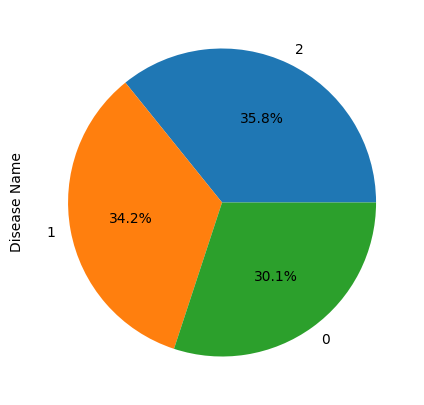

In [307]:
# plot for y varble
plt.figure(figsize=(10,5))
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### **Splitting the data**

In [308]:
# splitting the data into training and testing part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [309]:
# printing the shape of the training and testing data
print(f'Here is the shape of the x_train {x_train.shape}')
print(f'Here is the shape of the x_test {x_test.shape}')
print(f'Here is the shape of the y_train {y_train.shape}')
print(f'Here is the shape of the y_test {y_test.shape}')

Here is the shape of the x_train (1400, 16)
Here is the shape of the x_test (600, 16)
Here is the shape of the y_train (1400,)
Here is the shape of the y_test (600,)


# **MODEL BUILDING**

## **SUPERVISED MACHINE LEARNING**

## **Implementing Existing algorithams**

## Decision Tree Classifier

In [310]:
#import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
#prediction
dtc_pred = dt.predict(x_train)
#accuracy score
dtc_acc = accuracy_score(y_train,dtc_pred)
print("Accuracy Score = ",dtc_acc)
print('====================================================')
#finding the f1 score
dtc_f1 = f1_score(y_train,dtc_pred,average='macro')
print("f1 score score fo Decison tree =",dtc_f1)
print('====================================================')
#precision_score
dtc_pre = precision_score(y_train,dtc_pred,average='macro')
print('precision_score of Decision tree is =',dtc_pre)
print('====================================================')
#recall_score
dtc_rec = recall_score(y_train,dtc_pred,average='macro')
print('recall_score of Decision tree is =',dtc_rec)
print('===================================================')
#confusion matrix
dtc_cm = confusion_matrix(y_train, dtc_pred) 
print('coonfusion matrxi of decision tree =\n',dtc_cm)
print('===================================================')


Accuracy Score =  0.9971428571428571
f1 score score fo Decison tree = 0.9971600812549398
precision_score of Decision tree is = 0.9970870893715214
recall_score of Decision tree is = 0.9972508591065292
coonfusion matrxi of decision tree =
 [[429   0   0]
 [  0 486   0]
 [  2   2 481]]


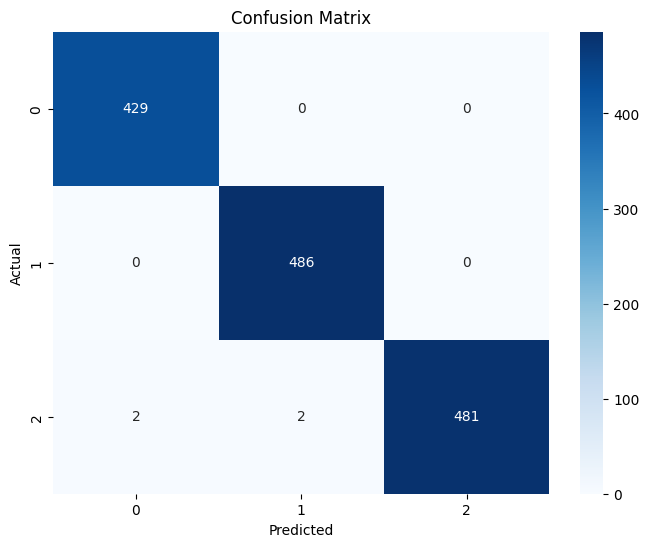

In [311]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dtc_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **RandomForestClassifier**

In [312]:
#import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
#prediction
rf_pred = rf.predict(x_train)
#accuracy score
rf_acc = accuracy_score(y_train,rf_pred)
print("Accuracy Score of RandomForest= ",rf_acc)
print('====================================================')
#finding the f1 score
rf_f1 = f1_score(y_train,rf_pred,average='macro')
print("f1 score score fo RandomForest =",rf_f1)
print('====================================================')
rf_pre = precision_score(y_train,rf_pred,average='macro')
print('precision_score of RandomForest is=',rf_pre)
print('====================================================')
#recall_score
rf_rec = recall_score(y_train,rf_pred,average='macro')
print('recall_score of RandomForest is =',rf_rec)
print('===================================================')
#confusion matrix
rf_cm = confusion_matrix(y_train, rf_pred) 
print('coonfusion matrxi of RandomForest =\n',rf_cm)
print('===================================================')


Accuracy Score of RandomForest=  0.9971428571428571
f1 score score fo RandomForest = 0.9971629505314473
precision_score of RandomForest is= 0.9970786391433651
recall_score of RandomForest is = 0.9972536874407818
coonfusion matrxi of RandomForest =
 [[429   0   0]
 [  0 484   2]
 [  2   0 483]]


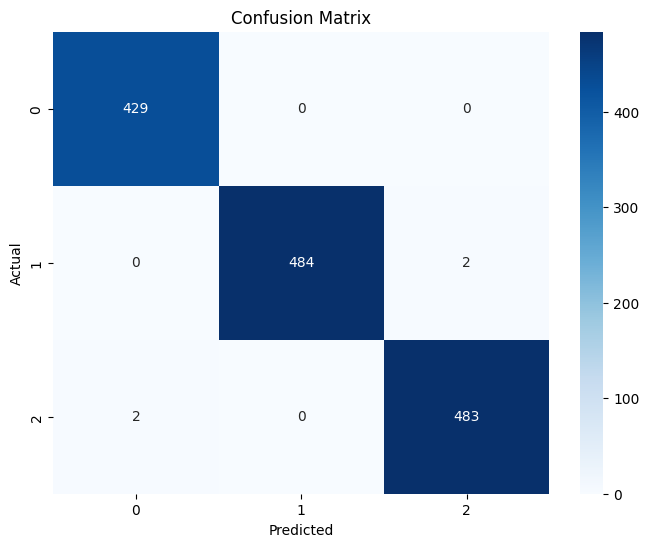

In [313]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **SUPPORT VECTOR MACHINE (SVM)**

In [314]:
#importing labraries
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovo',probability=True)
svc.fit(x_train,y_train)
#prediction
svc_pred = svc.predict(x_train)
#accuracy score
svc_acc = accuracy_score(y_train,svc_pred)
print("Accuracy Score of SVC= ",svc_acc)
print('====================================================')
#finding the f1 score
svc_f1 = f1_score(y_train,svc_pred,average='macro')
print("f1 score score fo SVC =",svc_f1)
print('====================================================')
svc_pre = precision_score(y_train,svc_pred,average='macro')
print('precision_score of SVC is=',svc_pre)
print('====================================================')
#recall_score
svc_rec = recall_score(y_train,svc_pred,average='macro')
print('recall_score of SVC is =',svc_rec)
print('===================================================')
#confusion matrix
svc_cm = confusion_matrix(y_train, svc_pred) 
print('coonfusion matrxi of SVC =\n',svc_cm)
print('===================================================')


Accuracy Score of SVC=  0.7407142857142858
f1 score score fo SVC = 0.7397773489087821
precision_score of SVC is= 0.7410999370345371
recall_score of SVC is = 0.7407055250125124
coonfusion matrxi of SVC =
 [[318  59  52]
 [ 61 381  44]
 [ 76  71 338]]


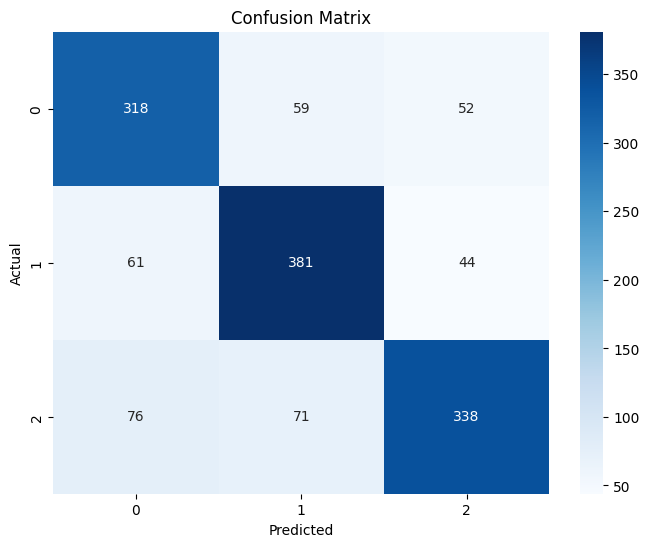

In [315]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Naive_bayes - GaussianNB**

In [316]:
from sklearn.naive_bayes import GaussianNB
navi = GaussianNB()
#fitting to the model
navi.fit(x_train,y_train)
#predicton
navi_pred = navi.predict(x_train)
#accuracy score 
navi_acc = accuracy_score(y_train,navi_pred)
print("Accuracy Score of navi= ",navi_acc)
print('====================================================')
#finding the f1 score
navi_f1 = f1_score(y_train,navi_pred,average='macro')
print("f1 score score fo navi =",navi_f1)
print('====================================================')
navi_pre = precision_score(y_train,navi_pred,average='macro')
print('precision_score of navi is=',navi_pre)
print('====================================================')
#recall_score
navi_rec = recall_score(y_train,navi_pred,average='macro')
print('recall_score of navi is =',navi_rec)
print('===================================================')
#confusion matrix
navi_cm = confusion_matrix(y_train, navi_pred) 
print('coonfusion matrxi of navi =\n',navi_cm)
print('===================================================')


Accuracy Score of navi=  0.5192857142857142
f1 score score fo navi = 0.5141901139242296
precision_score of navi is= 0.5180488898523911
recall_score of navi is = 0.5150701263721501
coonfusion matrxi of navi =
 [[176 137 116]
 [ 93 266 127]
 [ 77 123 285]]


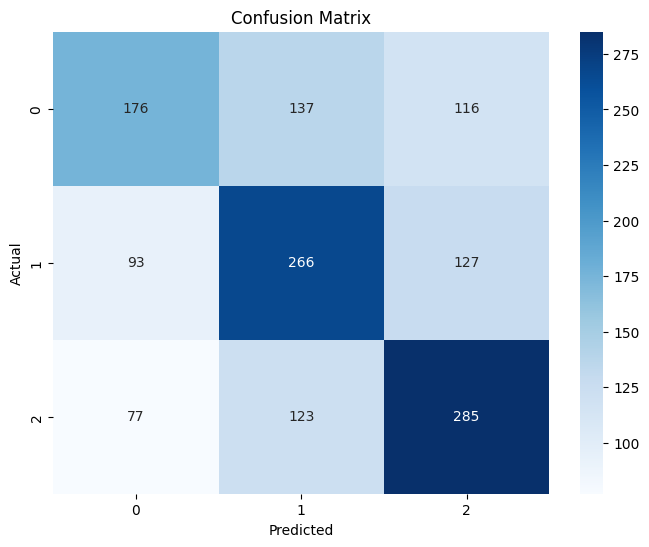

In [317]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(navi_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **KNeighborsClassifier**

In [318]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#fitting to the model
knn.fit(x_train,y_train)
#predicton
knn_pred = knn.predict(x_train)
#accuracy score 
knn_acc = accuracy_score(y_train,knn_pred)
print("Accuracy Score of navi= ",knn_acc)
print('====================================================')
#finding the f1 score
knn_f1 = f1_score(y_train,knn_pred,average='macro')
print("f1 score score fo navi =",knn_f1)
print('====================================================')
knn_pre = precision_score(y_train,knn_pred,average='macro')
print('precision_score of navi is=',knn_pre)
print('====================================================')
#recall_score
knn_rec = recall_score(y_train,knn_pred,average='macro')
print('recall_score of navi is =',navi_rec)
print('===================================================')
#confusion matrix
knn_cm = confusion_matrix(y_train, knn_pred) 
print('coonfusion matrxi of navi =\n',knn_cm)
print('===================================================')


Accuracy Score of navi=  0.6678571428571428
f1 score score fo navi = 0.6683544394059764
precision_score of navi is= 0.6902272515235491
recall_score of navi is = 0.5150701263721501
coonfusion matrxi of navi =
 [[338  66  25]
 [130 318  38]
 [127  79 279]]


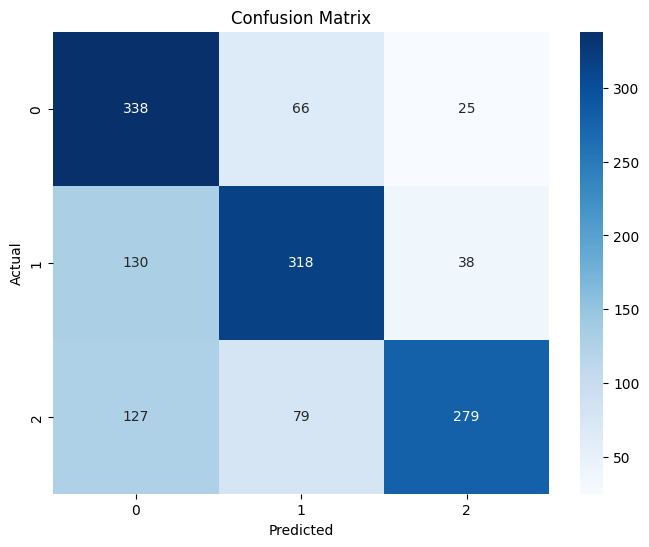

In [319]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Implementng Proposed algorithams**

### **LogisticRegression**

In [320]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#fitting to the model
lr.fit(x_train,y_train)
#predicton
lr_pred = lr.predict(x_train)
#accuracy score 
lr_acc = accuracy_score(y_train,lr_pred)
print("Accuracy Score of Logistic = ",knn_acc)
print('====================================================')
#finding the f1 score
lr_f1 = f1_score(y_train,lr_pred,average='macro')
print("f1 score score fo Logistic =",lr_f1)
print('====================================================')
#precision_score
lr_pre = precision_score(y_train,lr_pred,average='macro')
print('precision_score of Logistic is=',lr_pre)
print('====================================================')
#recall_score
lr_rec = recall_score(y_train,lr_pred,average='macro')
print('recall_score of Logistic is =',lr_rec)
print('===================================================')
#confusion matrix
lr_cm = confusion_matrix(y_train, lr_pred) 
print('coonfusion matrxi of Logistic =\n',lr_cm)
print('===================================================')


Accuracy Score of Logistic =  0.6678571428571428
f1 score score fo Logistic = 0.5090145180482972
precision_score of Logistic is= 0.5145760153981586
recall_score of Logistic is = 0.5099016817611702
coonfusion matrxi of Logistic =
 [[172 138 119]
 [ 90 265 131]
 [ 71 131 283]]


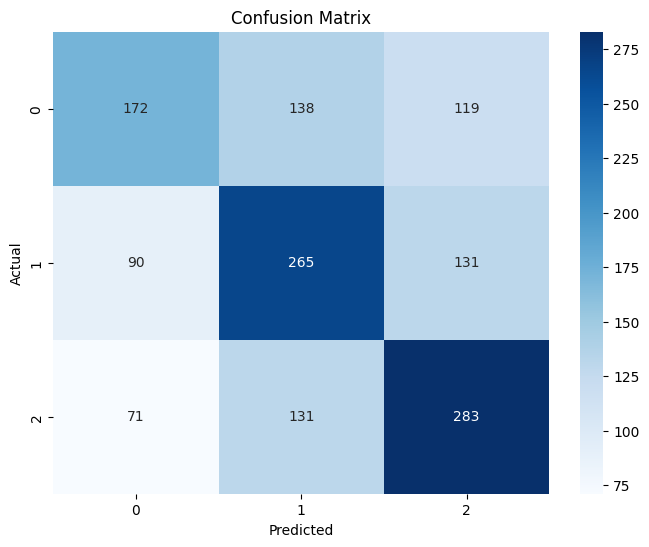

In [321]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **GradientBoostingClassifier**

In [322]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
#fitting to the model
gb.fit(x_train,y_train)
#predicton
gb_pred = gb.predict(x_train)
#accuracy score 
gb_acc = accuracy_score(y_train,gb_pred)
print("Accuracy Score of GradientBoostingClassifier = ",gb_acc)
print('====================================================')
#finding the f1 score
gb_f1 = f1_score(y_train,lr_pred,average='macro')
print("f1 score score fo GradientBoostingClassifier =",gb_f1)
print('====================================================')
#precision_score
gb_pre = precision_score(y_train,gb_pred,average='macro')
print('precision_score of GradientBoostingClassifier is=',gb_pre)
print('====================================================')
#recall_score
gb_rec = recall_score(y_train,gb_pred,average='macro')
print('recall_score of GradientBoostingClassifier is =',gb_rec)
print('===================================================')
#confusion matrix
gb_cm = confusion_matrix(y_train, gb_pred) 
print('coonfusion matrxi of GradientBoostingClassifier =\n',gb_cm)
print('===================================================')


Accuracy Score of GradientBoostingClassifier =  0.6757142857142857
f1 score score fo GradientBoostingClassifier = 0.5090145180482972
precision_score of GradientBoostingClassifier is= 0.6767697915221532
recall_score of GradientBoostingClassifier is = 0.6766254689126013
coonfusion matrxi of GradientBoostingClassifier =
 [[300  68  61]
 [ 93 326  67]
 [ 89  76 320]]


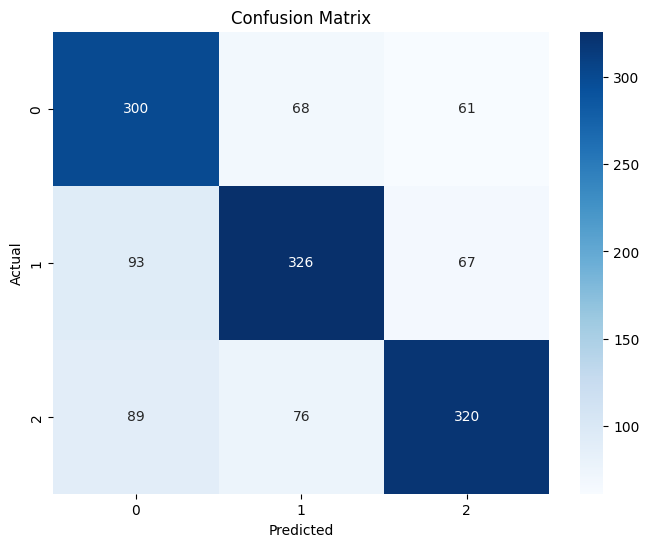

In [323]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **CNN ----Convolutional Neural Network**

In [324]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


import numpy as np
xtrain = x_train
xtext = x_test
# Reshape the data to be 3D with the shape (samples, features, 1)
x_train = np.expand_dims(xtrain, axis=2)
x_test = np.expand_dims(xtext, axis=2)


In [325]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
cnn = Sequential()

# Add a 1D convolutional layer
cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))

# Add a max pooling layer
cnn.add(MaxPooling1D(pool_size=2))

# Add a dropout layer to reduce overfitting
cnn.add(Dropout(0.5))

# Flatten the output
cnn.add(Flatten())

# Add a dense layer
cnn.add(Dense(64, activation='relu'))

# Add another dropout layer
cnn.add(Dropout(0.5))

# Output layer
cnn.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
cnn.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

In [326]:
# Train the model
history1 = cnn.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3433 - loss: 0.2941 - val_accuracy: 0.3283 - val_loss: -0.4517
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3417 - loss: -0.4386 - val_accuracy: 0.3283 - val_loss: -1.0053
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3555 - loss: -0.6588 - val_accuracy: 0.3283 - val_loss: -1.5218
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3413 - loss: -1.2110 - val_accuracy: 0.3283 - val_loss: -2.3243
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3467 - loss: -1.4017 - val_accuracy: 0.3283 - val_loss: -3.7030
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3349 - loss: -1.5378 - val_accuracy: 0.3283 - val_loss: -4.8655
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3398 - loss: -2.0627 - val_accuracy: 0.3283 - val_loss: -6.4026
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3266 - loss: -3.5569 - val_accuracy: 0.32

In [327]:
# Evaluate the model
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

train_loss, train_accuracy = cnn.evaluate(x_train, y_train)
print(f'Training accuracy: {train_accuracy:.4f}')



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3391 - loss: -169.2832 
Test accuracy: 0.3283
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3365 - loss: -57.1558
Training accuracy: 0.3471


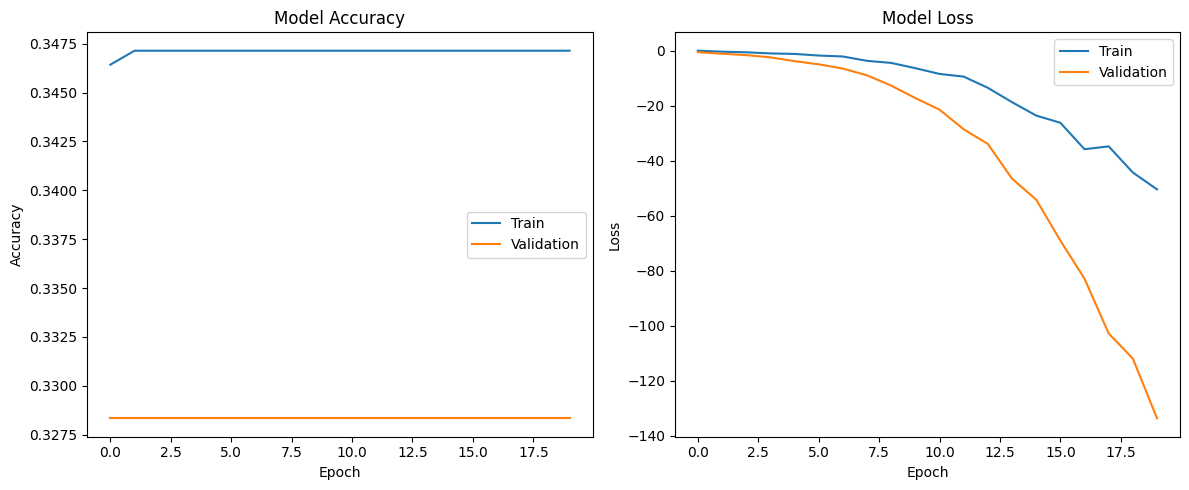

In [328]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer

# Assuming 'history' is the output from CNN.fit()
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()





## **LSTM ---  Long Short-Term Memory**

In [329]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import History

# # Assuming x and y are your features and labels
# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Print the shape of x_train and x_test to verify dimensions
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

# Reshape if necessary (from 2D to 3D)
if len(x_train.shape) == 2:
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Define the LSTM model
lstm = Sequential()

# Add an LSTM layer
lstm.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False))

# Add a dropout layer to reduce overfitting
lstm.add(Dropout(0.5))

# Add a dense layer
lstm.add(Dense(64, activation='relu'))

# Add another dropout layer
lstm.add(Dropout(0.5))

# Output layer
lstm.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
lstm.summary()

# Define a callback to track the training history
history = History()

# Train the model
history = lstm.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), callbacks=[history])


Shape of x_train: (1400, 16, 1)
Shape of x_test: (600, 16, 1)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,729 (53.63 KB)

 Trainable params: 13,729 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3367 - loss: 0.5163 - val_accuracy: 0.3283 - val_loss: -0.6383
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3478 - loss: -0.3527 - val_accuracy: 0.3283 - val_loss: -1.1880
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3399 - loss: -0.4208 - val_accuracy: 0.3283 - val_loss: -1.6250
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3378 - loss: -0.9031 - val_accuracy: 0.3283 - val_loss: -2.0839
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3308 - loss: -0.8632 - val_accuracy: 0.3283 - val_loss: -2.5053
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3363 - loss: -1.2365 - val_accuracy: 0.3283 - val_loss: -3.0340
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3454 - loss: -1.0513 - val_accuracy: 0.3283 - val_loss: -3.4700
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3544 - loss: -2.5049 - val_accuracy: 0.3

In [330]:
# Evaluate the model on the training data to find the training accuracy
train_loss, train_accuracy = lstm.evaluate(x_train, y_train)
print(f'Training accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test data
test_loss, lst_test_accuracy = lstm.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3365 - loss: -5.9445 
Training accuracy: 0.3471
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3391 - loss: -19.5063 
Test accuracy: 0.3283


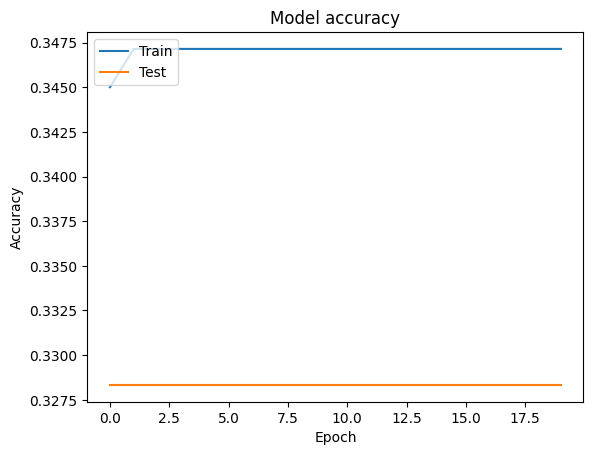

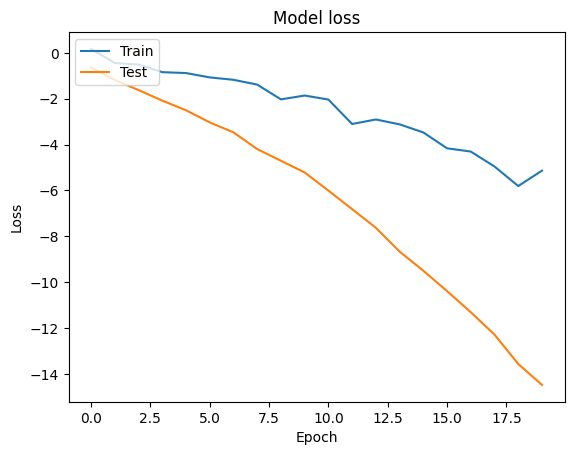

In [331]:
 #If needed, plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# **Accuracy Comparison Plots**

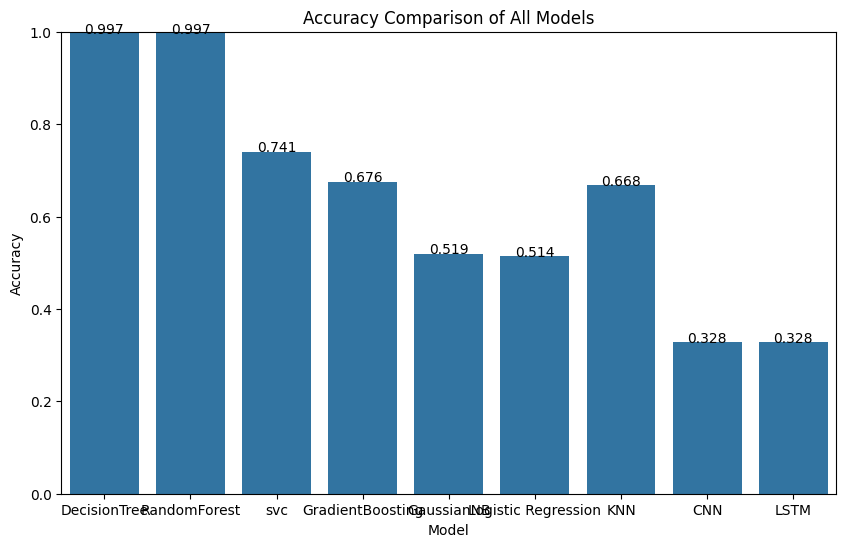

In [332]:

model_names = ['DecisionTree', 'RandomForest', 'svc', 'GradientBoosting', 'GaussianNB', 'Logistic Regression', 'KNN','CNN','LSTM']
accuracies = [dtc_acc, rf_acc, svc_acc, gb_acc, navi_acc, lr_acc, knn_acc,test_accuracy,lst_test_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models')
plt.ylim(0,1)
for i in range(len(accuracies)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.3f}', ha='center')
plt.show()


In [333]:
import plotly.graph_objects as go

# Data for Models and their Accuracies

model_names = ['DecisionTree', 'RandomForest', 'svc', 'GradientBoosting', 'GaussianNB', 'Logistic Regression', 'KNN','CNN']
accuracies = [dtc_acc, rf_acc, svc_acc, gb_acc, navi_acc, lr_acc, knn_acc,]

# Create the bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=model_names,
    y=accuracies,
    name='Accuracy'
))

# Set the layout
fig.update_layout(
    title='Model Accuracies',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    barmode='group',
    bargroupgap=0.2
)

# Show the plot
fig.show()


In [334]:
import joblib
joblib.dump(rf, "random_forest_model.joblib")

['random_forest_model.joblib']

In [335]:
model = joblib.load("random_forest_model.joblib")

# Example new data
new_data = {
    'Nausea': [1],
    'Lumber Pain': [1],
    'Urine Pushing': [0],
    'Micturition Pains': [0],
    'Burning of Urethra': [0],
    'Itch': [1],
    'Swelling of Urethra Outlet': [0],
    'Inflammation of Urinary Bladder': [1],
    'Nephritis of Renal Pelvis Origin': [0],
    'Irregular Periods': [1],
    'No Periods': [1],
    'Excessive Hair Growth': [0],
    'Buttocks Weight Gain': [0],
    'Belly Fat': [1],
    'Hair Loss': [0],
    'Acne': [1],
    # Ensure all required features are included
}

# Convert the new data to DataFrame
new_df = pd.DataFrame(new_data)
# Make prediction
# 	Yes	Yes	No	No	Yes	No	Yes	PCOS
predictions = model.predict(new_df)
if predictions == 0:
    print('Healthy')
elif predictions == 1:
    print('PCOS')
else:
    print('UTI')



PCOS
